In [1]:
using Plots, Wavelets, LinearAlgebra, Statistics, Random, FileIO, Images, ImageQualityIndexes
include("../src/AutocorrelationShell.jl")
using Main.AutocorrelationShell

In [15]:
plot_heatmap(x) = heatmap(
    x,
    yflip=true,
    axis=nothing,
    colorbar_entry=false,
    aspect_ratio=:equal,
    showaxis=false,
    clim=(0,1)
)

plot_heatmap (generic function with 1 method)

In [3]:
function threshold_psnr(img;L1,L2,P,Q,noise,step_size,thresh_type,random_state)
    rng = MersenneTwister(random_state)
    img_noise = make_noisy(img,rng,noise)
    ac = ac2d(img_noise,L1,L2,P,Q)

    ac_max = maximum(abs.(ac[:]))
    step = collect(0:step_size:ac_max)

    Σ = zeros(length(step))
    for (i, s) in enumerate(step)
        Σ[i] = assess(PSNR(), img, iac2d(acthreshold(ac, thresh_type, s)))
    end

    return (threshold=step, psnr=Σ)
end

threshold_psnr (generic function with 1 method)

In [4]:
function threshold_psnr_plot(img;L1,L2,P,Q,low_noise=0.1,high_noise=0.7,step=0.1)
    option1 = (
        L1 = L1,
        L2 = L2,
        P = P,
        Q = Q,
        noise = low_noise,
        step_size = step,
        thresh_type = "soft",
        random_state = 123
    )
    option2 = (
        L1 = L1,
        L2 = L2,
        P = P,
        Q = Q,
        noise = low_noise,
        step_size=step,
        thresh_type="hard",
        random_state=123
    )
    option3 = (
        L1 = L1,
        L2 = L2,
        P = P,
        Q = Q,
        noise = high_noise,
        step_size=step,
        thresh_type="soft",
        random_state=123
    )
    option4 = (
        L1 = L1,
        L2 = L2,
        P = P,
        Q = Q,
        noise = high_noise,
        step_size=step,
        thresh_type="hard",
        random_state=123
    )
    

    Σ₁ = threshold_psnr(img;option1...)
    Σ₂ = threshold_psnr(img;option2...)
    Σ₃ = threshold_psnr(img;option3...)
    Σ₄ = threshold_psnr(img;option4...)
    
    plot_opt = (
        xlabel="Threshold",
        ylabel="PSNR",
        label="",
        legend=false,
        linewidth=2,
        color=:blue
    )

    plot(
        Σ₁.threshold, Σ₁.psnr;
        plot_opt...,
        linestyle=:dot,
        label="soft, low noise"
    )
    plot!(
        Σ₂.threshold, Σ₂.psnr;
        plot_opt...,
        label="hard, low noise"
    )
    plot!(
        Σ₃.threshold, Σ₃.psnr;
        plot_opt...,
        color=:red,
        linestyle=:dot,
        label="soft, high noise"
    )
    p = plot!(
        Σ₄.threshold, Σ₄.psnr;
        plot_opt...,
        color=:red,
        label="hard, high noise",
        legend=true
    )
    return p
end

threshold_psnr_plot (generic function with 1 method)

In [5]:
wavelet_opt = (
    L1 = 6,
    L2 = 6,
    Q = qfilter(wavelet(WT.db2)),
    P = pfilter(wavelet(WT.db2))
)

(L1 = 6, L2 = 6, Q = [0.044194173824159244, 5.887846720064156e-17, -0.397747564417433, 0.7071067811865475, -0.397747564417433, 5.887846720064156e-17, 0.044194173824159244], P = [-0.044194173824159244, -5.887846720064156e-17, 0.397747564417433, 0.7071067811865475, 0.397747564417433, -5.887846720064156e-17, -0.044194173824159244])

In [6]:
boat = load("../test/pictures/boat.png")
boat = Float64.(Gray.(boat))

512×512 Array{Float64,2}:
 0.498039  0.482353  0.490196  0.470588  …  0.647059  0.662745  0.65098 
 0.501961  0.494118  0.501961  0.478431     0.662745  0.639216  0.654902
 0.501961  0.486275  0.501961  0.494118     0.698039  0.627451  0.686275
 0.486275  0.498039  0.501961  0.505882     0.654902  0.67451   0.639216
 0.494118  0.490196  0.501961  0.494118     0.670588  0.670588  0.65098 
 0.490196  0.498039  0.494118  0.494118  …  0.670588  0.678431  0.670588
 0.498039  0.498039  0.494118  0.486275     0.678431  0.670588  0.658824
 0.482353  0.529412  0.470588  0.501961     0.67451   0.678431  0.662745
 0.494118  0.501961  0.486275  0.501961     0.662745  0.698039  0.643137
 0.486275  0.501961  0.498039  0.486275     0.670588  0.662745  0.67451 
 0.478431  0.494118  0.501961  0.494118  …  0.65098   0.678431  0.686275
 0.494118  0.498039  0.490196  0.478431     0.623529  0.698039  0.686275
 0.478431  0.501961  0.521569  0.470588     0.639216  0.67451   0.67451 
 ⋮                       

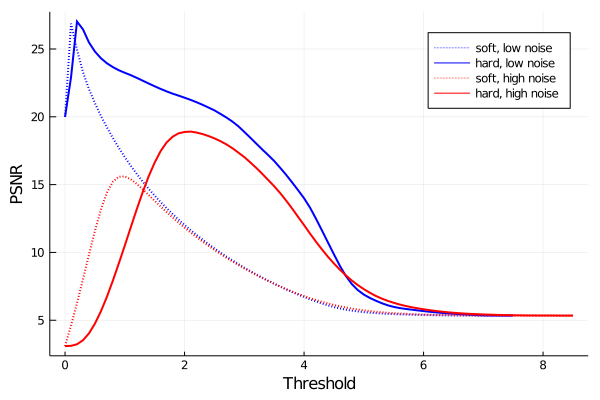

In [7]:
psnr_boat = threshold_psnr_plot(boat; wavelet_opt...)

In [8]:
png("boat_psnr")

In [9]:
option1 = (
    L1 = 6,
    L2 = 6,
    P = pfilter(wavelet(WT.db2)),
    Q = qfilter(wavelet(WT.db2)),
    noise = 0.1,
    step_size = 0.1,
    thresh_type = "soft",
    random_state = 123
)
Σ₁ = threshold_psnr(boat;option1...)

(threshold = [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9  …  6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5], psnr = [19.99797713206697, 26.869316474488972, 24.95667169062749, 23.294210166109334, 22.04766746514747, 21.001427792774578, 20.071118965924626, 19.223710242586147, 18.440200176880214, 17.710742141588995  …  5.349968291385128, 5.3472095276776175, 5.3451567583611865, 5.343867471159224, 5.343205130394836, 5.342868325454436, 5.342711167155604, 5.342648238216295, 5.342615792313054, 5.342602258412077])

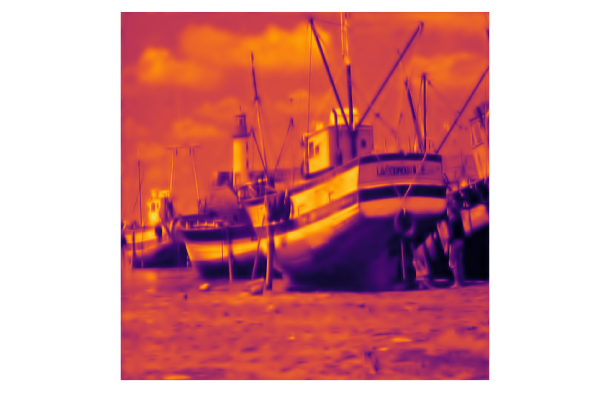

In [13]:
D = ac2d(boat, 6, 6, pfilter(wavelet(WT.db2)), qfilter(wavelet(WT.db2)))
t₁ = Σ₁.threshold[findmax(Σ₁.psnr)[2]]
R₁ = iac2d(acthreshold(D, "soft", t₁))
heatmap(
    R₁,
    yflip=true,
    axis=nothing,
    colorbar_entry=false,
    aspect_ratio=:equal,
    showaxis=false,
    clim=(0,1)
)

In [14]:
png("boat_psnr_lowsoft")

In [16]:
option2 = (
    L1 = 6,
    L2 = 6,
    P = pfilter(wavelet(WT.db2)),
    Q = qfilter(wavelet(WT.db2)),
    noise = 0.1,
    step_size = 0.1,
    thresh_type = "hard",
    random_state = 123
)
Σ₂ = threshold_psnr(boat;option2...)

(threshold = [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9  …  6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5], psnr = [19.99797713206697, 22.905912522951958, 27.023475877982257, 26.447338424252123, 25.485079902579166, 24.81271720823324, 24.318381812679746, 23.949811356846663, 23.666972550681344, 23.433230678496678  …  5.451936345222622, 5.427362608263367, 5.401227451188082, 5.375256924936172, 5.358811990492574, 5.350585015467909, 5.346059227355098, 5.344099583818971, 5.343489025054043, 5.34278586065869])

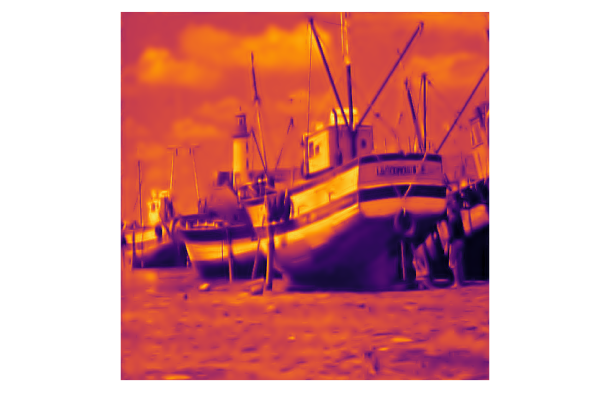

In [17]:
t₂ = Σ₂.threshold[findmax(Σ₂.psnr)[2]]
R₂ = iac2d(acthreshold(D, "hard", t₂))
plot_heatmap(R₂)

In [18]:
png("lenna_psnr_lowhard")

In [20]:
option3 = (
    L1 = 6,
    L2 = 6,
    P = pfilter(wavelet(WT.db2)),
    Q = qfilter(wavelet(WT.db2)),
    noise = 0.7,
    step_size=0.1,
    thresh_type="soft",
    random_state=123
)
Σ₃ = threshold_psnr(boat;option3...)

(threshold = [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9  …  7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5], psnr = [3.096016331781838, 4.607556138991359, 6.263140597074791, 8.026486025387051, 9.832471608544438, 11.58718385672039, 13.15875399240544, 14.402115727910022, 15.211247720642513, 15.581283816654603  …  5.343939113675185, 5.343518600847489, 5.343232775808301, 5.343024962118765, 5.34287594172989, 5.342769310137799, 5.342697144694434, 5.342648907143964, 5.34262084901362, 5.34260600727248])

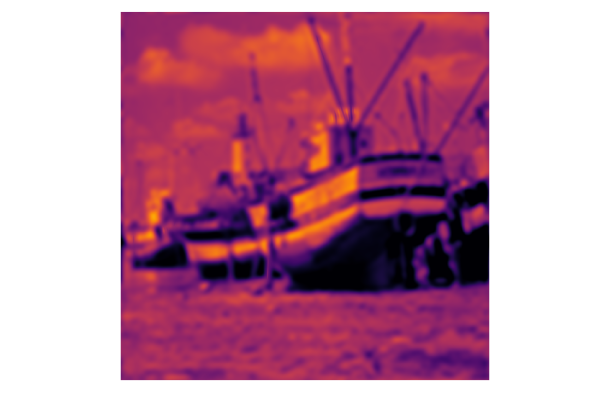

In [22]:
t₃ = Σ₃.threshold[findmax(Σ₃.psnr)[2]]
R₃ = iac2d(acthreshold(D, "soft", t₃))
plot_heatmap(R₃)

In [23]:
png("lenna_psnr_highsoft")

In [25]:
option4 = (
    L1 = 6,
    L2 = 6,
    P = pfilter(wavelet(WT.db2)),
    Q = qfilter(wavelet(WT.db2)),
    noise = 0.7,
    step_size=0.1,
    thresh_type="hard",
    random_state=123
)
Σ₄ = threshold_psnr(boat;option4...)

(threshold = [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9  …  7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5], psnr = [3.096016331781838, 3.112692697274393, 3.2303175103911324, 3.524822588436842, 4.029174900827896, 4.748657654637362, 5.656123528629892, 6.72091591523764, 7.916430324108075, 9.191293997104559  …  5.3593394360980025, 5.354207769327532, 5.350694960865407, 5.348402521730274, 5.346809769887509, 5.345548833434134, 5.344526741906583, 5.343766945889261, 5.343270210326611, 5.342911080225377])

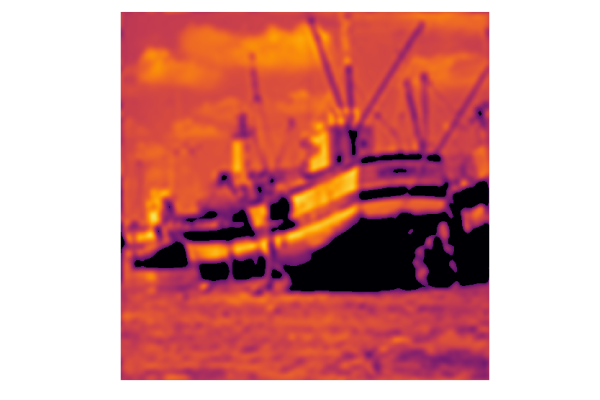

In [26]:
t₄ = Σ₄.threshold[findmax(Σ₄.psnr)[2]]
R₄ = iac2d(acthreshold(D, "hard", t₄))
plot_heatmap(R₄)

In [27]:
png("boat_psnr_highhard")

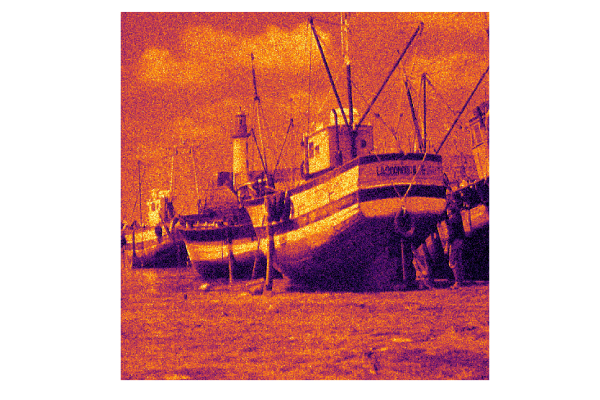

In [28]:
rng = MersenneTwister(123)
img_noise = make_noisy(boat,rng,0.1)
plot_heatmap(img_noise)

In [29]:
png("boat_low")

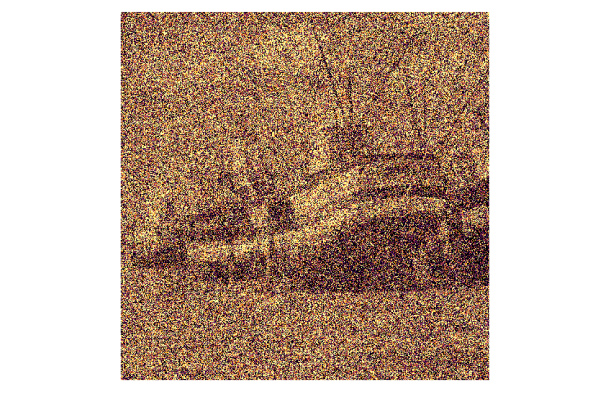

In [30]:
rng = MersenneTwister(123)
img_noise = make_noisy(boat,rng,0.7)
plot_heatmap(img_noise)

In [31]:
png("boat_high")